# 🪄 Box-Cox Transformation: The Automatic Normalizer

The Box-Cox transformation is a statistical technique that transforms non-normal dependent variables into a normal shape. It is a "parameterized" transformation, meaning it relies on a value called **$\lambda$ (lambda)**.

---

### 1. How it Works: The Search for $\lambda$
The Box-Cox power transformation is defined as:



$$y(\lambda) = \begin{cases} \frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \ln(x) & \text{if } \lambda = 0 \end{cases}$$

**The Magic:** The algorithm tests a range of $\lambda$ values (usually between -5 and 5) and selects the one that maximizes the **Log-Likelihood**—essentially picking the $\lambda$ that makes the resulting distribution look most like a perfect Bell Curve.

---

### 2. $\lambda$ as a "Universal Remote"
Depending on the value of $\lambda$ found by the algorithm, Box-Cox automatically mimics other transformations:

| $\lambda$ Value | Equivalent Transformation |
| :--- | :--- |
| **$\lambda = 2.0$** | Square Transform ($x^2$) |
| **$\lambda = 1.0$** | No Transformation (Identity) |
| **$\lambda = 0.5$** | Square Root Transform ($\sqrt{x}$) |
| **$\lambda = 0.0$** | Natural Log Transform ($\ln x$) |
| **$\lambda = -1.0$** | Reciprocal Transform ($1/x$) |

[Image comparing different lambda values and their resulting distribution shapes]

---

### 3. The One Big Constraint ⚠️
**Box-Cox only works for strictly positive data ($x > 0$).**
* If your data contains **zeros or negative numbers**, the math breaks because you cannot raise a negative number to a fractional power or take the log of zero.
* **Solution:** If you have non-positive data, use the **Yeo-Johnson Transformation**, which is a modern adaptation of Box-Cox designed to handle zero and negative values.

---

### 4. Box-Cox vs. Yeo-Johnson

| Feature | Box-Cox | Yeo-Johnson |
| :--- | :--- | :--- |
| **Data Requirements** | Strictly Positive ($>0$) | Positive, Zero, and Negative |
| **Goal** | Minimize Skewness | Minimize Skewness |
| **Automatic?** | Yes | Yes |

---

### 5. 🐍 Python Implementation

You can use `scipy` to find the best $\lambda$ and transform the data in one go.


Optimal Lambda found: -0.7377


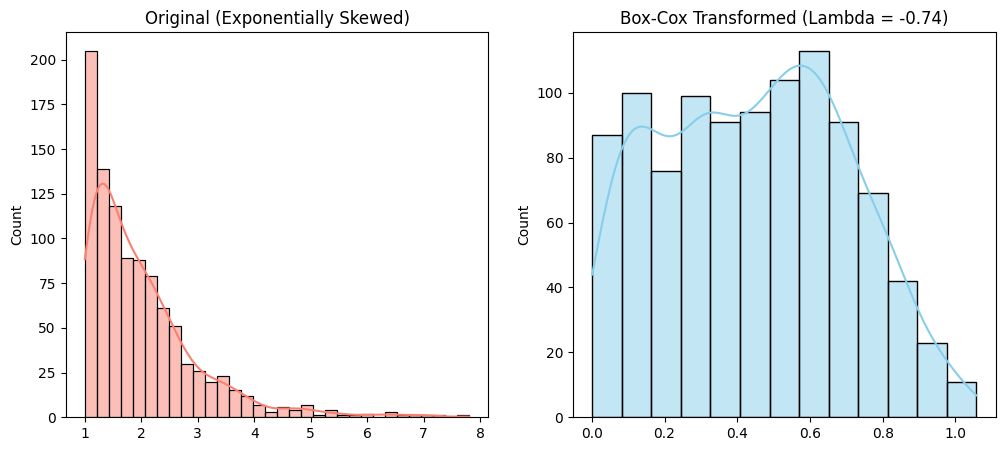

In [1]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Right-Skewed Data
data = np.random.exponential(scale=1.0, size=1000) + 1 # Ensure positive

# 2. Apply Box-Cox
# 'fitted_data' is the transformed data, 'lmbda' is the optimal value found
transformed_data, best_lambda = stats.boxcox(data)

print(f"Optimal Lambda found: {best_lambda:.4f}")

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=ax1, color='salmon')
ax1.set_title("Original (Exponentially Skewed)")

sns.histplot(transformed_data, kde=True, ax=ax2, color='skyblue')
ax2.set_title(f"Box-Cox Transformed (Lambda = {best_lambda:.2f})")

plt.show()